In [17]:
path_coordinates_cache = "Coordinates/coordinates_cache_post2000.csv"
path_buildings = "../Algandmed/Ehitised/Elamud_post2000.csv"

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import shapefile
from descartes import PolygonPatch


buildings = pd.read_csv(path_buildings)
coords = pd.read_csv(path_coordinates_cache, index_col=0)
merged = buildings.merge(coords, how='left', left_on="Aadress tekstina kehtiv", right_index=True)

sf = shapefile.Reader("../Algandmed/EestiKaart/omavalitsus_20160501")

c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
BLUE = '#6699cc'
WHITE = '#ffffff'
BLACK = '#000000'

def add_polygon_patch(ax, poly):
    if poly["type"] == 'Polygon':
        ax.add_patch(PolygonPatch(poly, fc=WHITE, ec=BLACK, alpha=0.5, zorder=-1 ))
    elif poly["type"] == 'MultiPolygon':
        for coords in poly["coordinates"]:
            poly_part = {'type':'Polygon','coordinates':coords}
            ax.add_patch(PolygonPatch(poly_part, fc=WHITE, ec=BLACK, alpha=0.5, zorder=-1 ))
    else:
        print("Ooh Noo!")

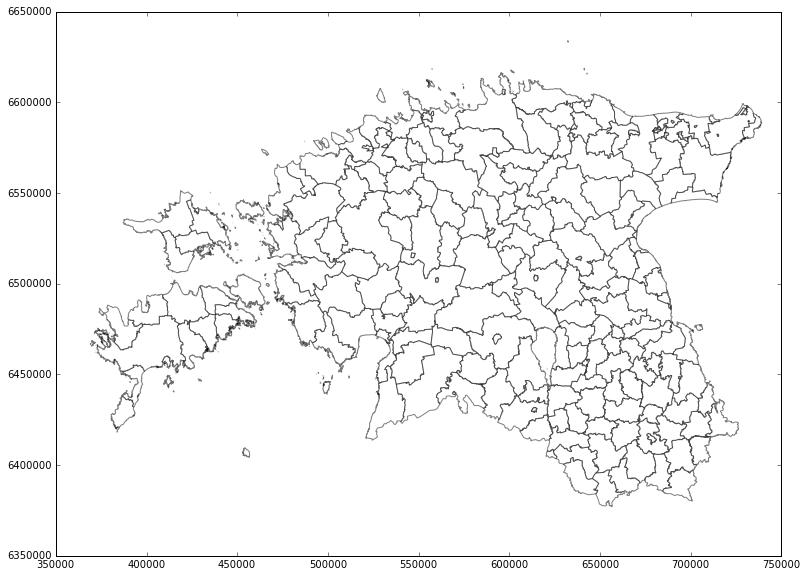

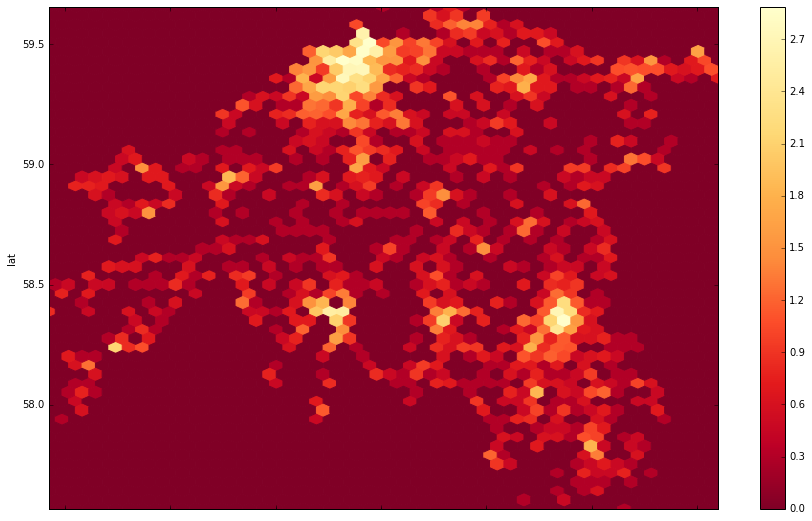

In [60]:
fig = plt.figure(figsize=(13,10)) 
ax = fig.gca() 

for shape in sf.shapes():
    poly = shape.__geo_interface__
    add_polygon_patch(ax, poly)

ax.axis('scaled')
merged.plot(kind='hexbin', x='lng', y='lat', gridsize=50, bins='log',  figsize=(15, 9), cmap=plt.cm.YlOrRd_r);
plt.show()

In [27]:
import pyproj
WGS84 = pyproj.Proj(init="EPSG:4326")
EST97 = pyproj.Proj(init="EPSG:3301")
x,y = pyproj.transform(WGS84,EST97,merged.lng.values,merged.lat.values)

In [38]:

merged['x'] = x
merged['y'] = y

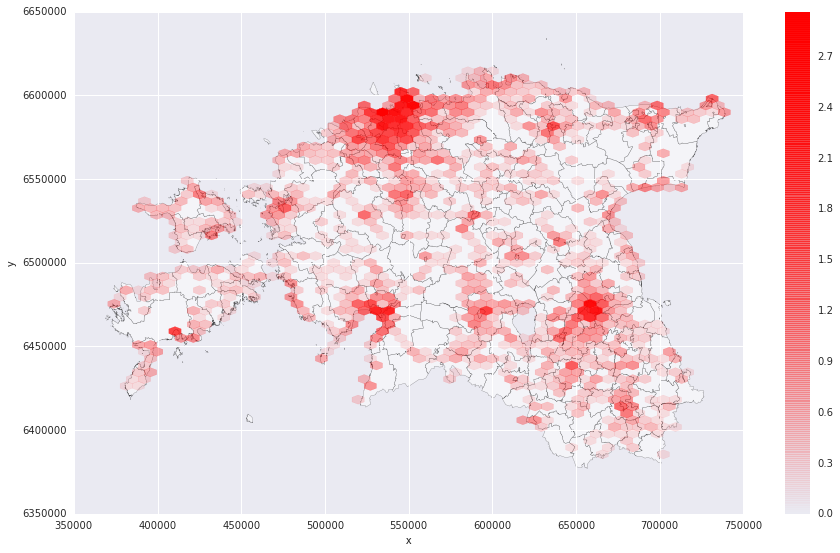

In [78]:
fig = plt.figure(figsize=(13,10)) 
ax = fig.gca() 

cdict = {'red':  ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         
          'alpha': ((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0))
        }
plt.register_cmap(name='RedAlpha', data=cdict)

cdict = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
          'alpha': ((0.0, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0))
        }
plt.register_cmap(name='BlueRedAlpha2', data=cdict)


for shape in sf.shapes():
    poly = shape.__geo_interface__
    add_polygon_patch(ax, poly)

merged.plot(kind='hexbin', x='x', y='y', gridsize=50, bins='log',  figsize=(15, 9), cmap="RedAlpha", ax=ax);
ax.axis('scaled')

plt.show()